In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
# Finding missing values
df.isnull().sum() # therefore no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: >

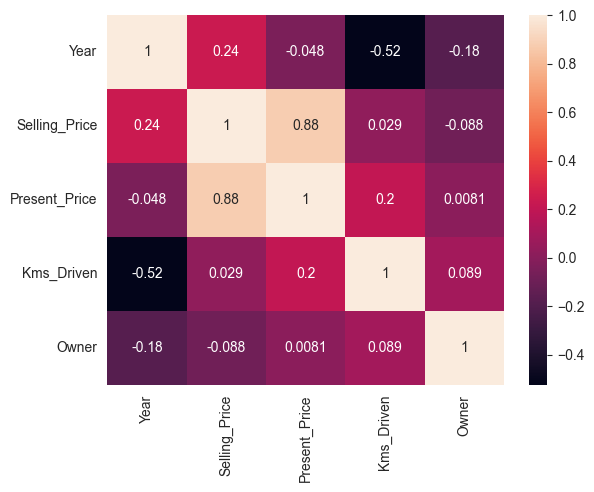

In [6]:
# now we will see the correlation of each attribute with every other
df_numeric=df.select_dtypes(include=[np.number])
df_numeric.corr()
sns.heatmap(df_numeric.corr(),annot=True)

In [7]:
# now we will check the unique values of string columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# We will replace the values of string columns by encoding them
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission']=df['Transmission'].replace({'Manual': 0,'Automatic': 1})
df['Seller_Type']=df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
df

/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_4799/1138591153.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_4799/1138591153.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transmission']=df['Transmission'].replace({'Manual': 0,'Automatic': 1})
/var/folders/cz/jms94_kj7v552q9spmvhms3m0000gn/T/ipykernel_4799/1138591153.py:4: FutureWarning: Downcasting behavior in `repla

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


<Axes: >

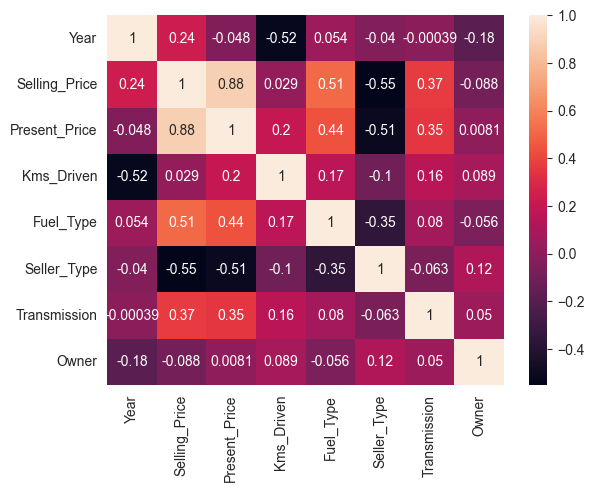

In [9]:
df_numeric=df.select_dtypes(include=[np.number])
df_numeric.corr()
sns.heatmap(df_numeric.corr(),annot=True)

In [31]:
# Now we will make the dependant and independent dataset
X=df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']
print(X.columns.tolist())

['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'Box Plot After Scaling')

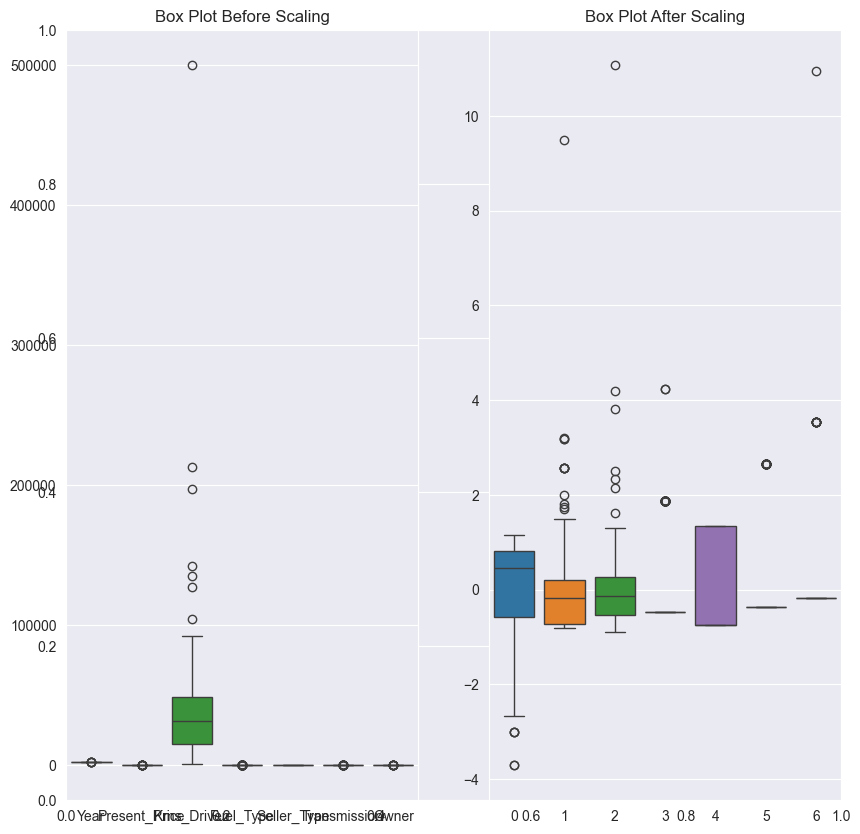

In [13]:
plt.subplots(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Box Plot Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Box Plot After Scaling')

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [15]:
print(regressor.intercept_,regressor.coef_)

-730.6839480707482 [ 3.63622678e-01  4.39942393e-01 -5.46717653e-06  1.32389894e+00
 -1.16866879e+00  1.63644708e+00 -9.20154941e-01]


In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

3.528927253897643
1.2217615462341203
1.878543918543733
0.846805395765439


In [17]:
# Using Ridge Regression
from sklearn.linear_model import Ridge

regressor = Ridge()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

3.5141891508990417
1.2180960961524734
1.8746170678031933
0.8474451929881064


In [18]:
from sklearn.linear_model import LassoCV

regressor = LassoCV(cv=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

7.306766227861538
1.974076311239215
2.7031030738507806
0.6828052606424821


In [19]:
from sklearn.linear_model import RidgeCV

regressor = RidgeCV(cv=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

3.5141891508990417
1.2180960961524734
1.8746170678031933
0.8474451929881064


In [20]:
from sklearn.linear_model import ElasticNetCV

regressor = ElasticNetCV(cv=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

7.969240998588503
2.0722543314393587
2.8229844134512154
0.6540465039396322


In [21]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

4.404693095422503
1.4234287536004062
2.0987360709299545
0.8087874396439668


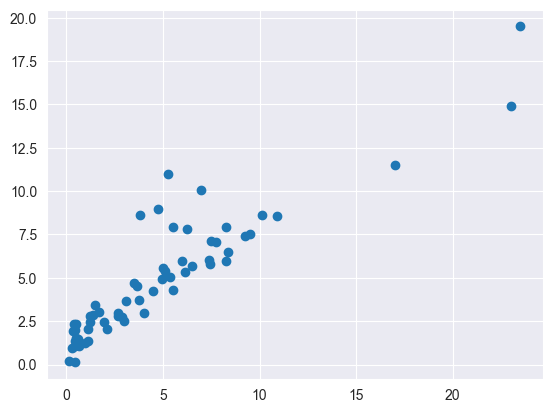

In [22]:
plt.scatter(y_test,y_pred)

In [27]:
import pickle
pickle.dump(scaler,open('scaler1.pkl','wb'))

In [28]:
from sklearn.linear_model import LinearRegression
import pickle

# Train the model
model =LinearRegression()
model.fit(X_train_scaled, y_train)

# Save the trained model
pickle.dump(model, open('LinearRegression1.pkl', 'wb'))

In [26]:
regressor.predict(scaler.transform(X_test_scaled))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


array([-913.00442101, -912.92223647, -913.11125465, -913.20758023,
       -913.01253228, -912.99238663, -913.03937625, -913.08372942,
       -913.00461023, -913.02652193, -912.86475142, -913.12063994,
       -913.0133396 , -912.9641676 , -913.0706228 , -913.09906887,
       -913.15950574, -912.84981568, -912.96397838, -912.955905  ,
       -913.12530737, -912.94872727, -913.11125465, -913.17970183,
       -913.08303562, -913.12771678, -913.06746914, -913.17516055,
       -912.95811256, -912.99855519, -913.12494785, -913.00097723,
       -913.24581529, -913.28797353, -912.93996008, -913.04512855,
       -913.03732009, -913.17505966, -913.10209639, -913.13486933,
       -913.36855604, -913.41770278, -913.04891295, -913.08417094,
       -912.9943419 , -913.12234292, -913.00350017, -913.10781088,
       -913.100898  , -913.12771678, -913.0706228 , -912.95811256,
       -912.82183638, -912.80724119, -912.98935911, -912.92223647,
       -913.01269624, -912.93485114, -913.36639892, -912.95440